# Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different!

## Goals
* Understand different mathmatical definitions of outliers
* Use Python tools to recognize outliers and remove them

### Useful Links

* [Wikipedia Article](https://en.wikipedia.org/wiki/Outlier)
* [NIST Outlier Links](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

-------------

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Generating Data

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

## Visualize and Describe the Data

<AxesSubplot:>

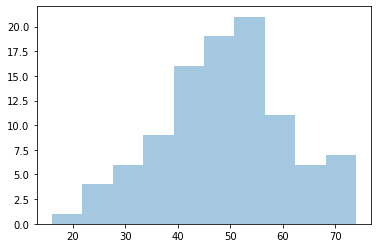

In [5]:
sns.distplot(sample,bins=10,kde=False)

<AxesSubplot:>

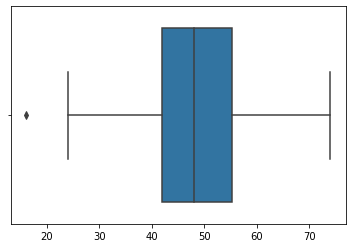

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

## Trimming or Fixing Based Off Domain Knowledge

If we know we're dealing with a dataset pertaining to voting age (18 years old in the USA), then it makes sense to either drop anything less than that OR fix values lower than 18 and push them up to 18.

In [11]:
ser[ser > 18]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [12]:
# It dropped one person
len(ser[ser > 18])

99

In [13]:
def fix_values(age):
    
    if age < 18:
        return 18
    else:
        return age

In [14]:
# "Fixes" one person's age
ser.apply(fix_values)

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [15]:
len(ser.apply(fix_values))

100

--------

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

## Ames Data Set

Let's explore any extreme outliers in our Ames Housing Data Set

In [2]:
df = pd.read_csv("./datasets/Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
new_df = df.select_dtypes(exclude='O')

<Axes: >

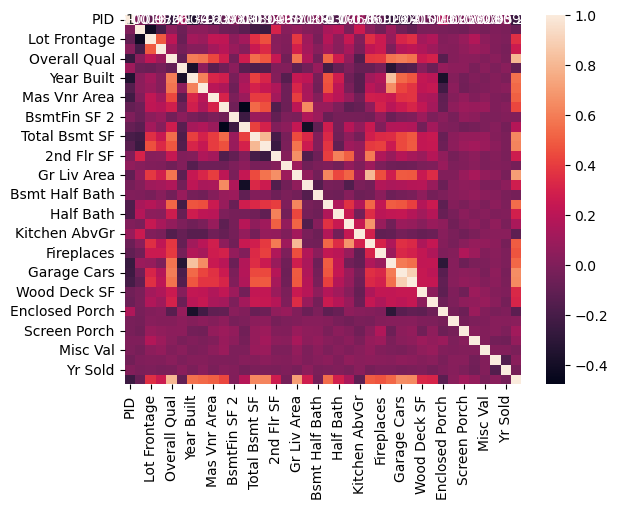

In [15]:
sns.heatmap(new_df.corr())

In [17]:
new_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

/tmp/ipykernel_25821/4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

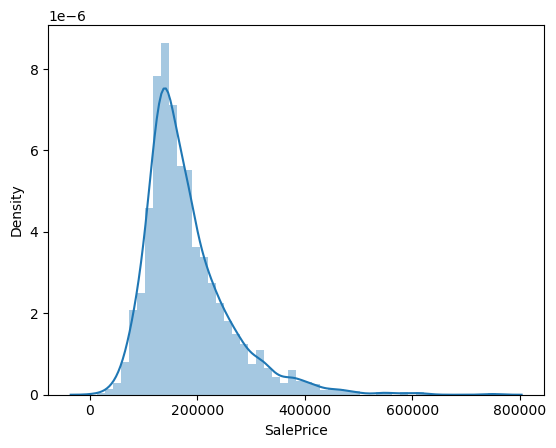

In [22]:
sns.distplot(df["SalePrice"])

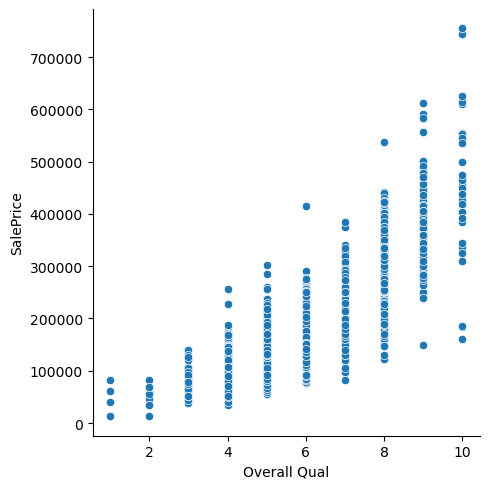

In [28]:
sns.relplot(data=df, x='Overall Qual', y='SalePrice' ,kind='scatter')

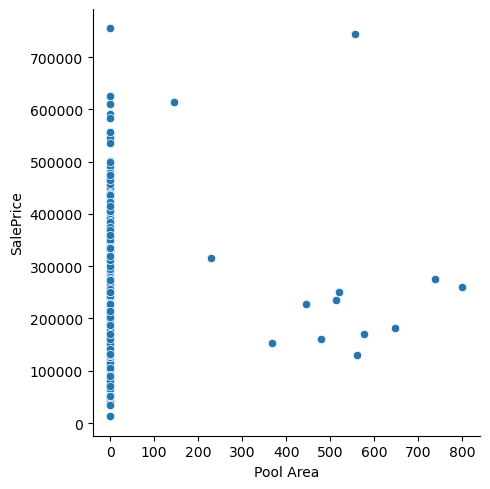

In [33]:
sns.relplot(data=df, x='Pool Area', y='SalePrice', kind='scatter')

In [36]:
df[(df['Pool Area']  <1) & (df['SalePrice'] > 700000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1767,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [37]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

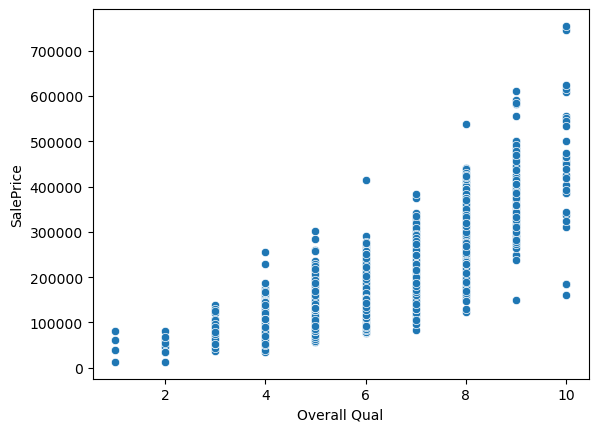

In [9]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [10]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

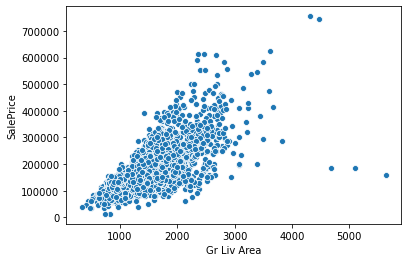

In [27]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [32]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [33]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [34]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [35]:
df = df.drop(ind_drop,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

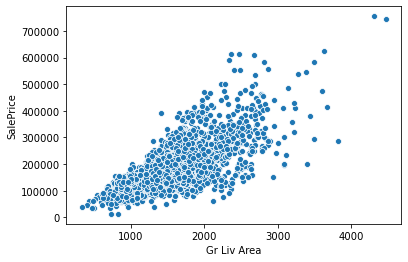

In [36]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

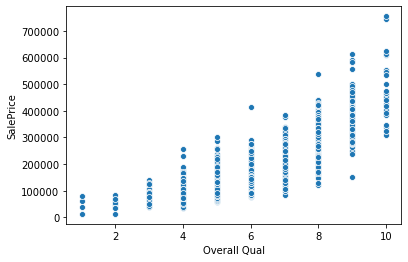

In [37]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [38]:
df.to_csv("../DATA/Ames_outliers_removed.csv",index=False)

In [39]:
def percentage_missing(df):
    missing = 100 * df.isnull().sum() / len(df)
    missing = missing[missing > 0].sort_values()
    return missing 
    

In [41]:
miss = percentage_missing(df)

In [ ]:
len(miss)

<Axes: >

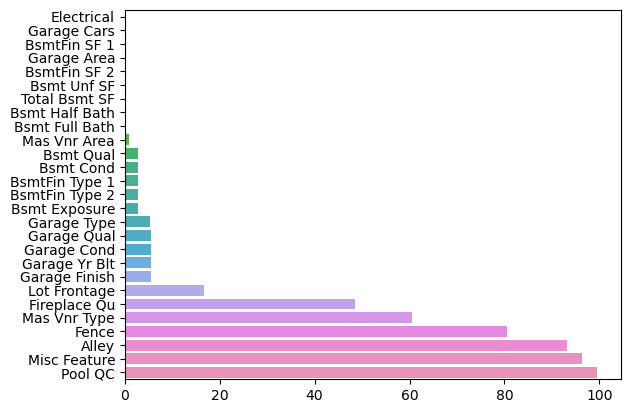

In [42]:
sns.barplot(x=miss, y=miss.index)

In [48]:
df = df.dropna(axis=0, subset=['BsmtFin Type 1','BsmtFin SF 1'])

In [49]:
miss = percentage_missing(df)

----

In [51]:
miss

BsmtFin Type 2     0.035088
Electrical         0.035088
Garage Area        0.035088
Garage Cars        0.035088
Bsmt Exposure      0.105263
Mas Vnr Area       0.807018
Garage Type        5.017544
Garage Cond        5.087719
Garage Qual        5.087719
Garage Yr Blt      5.087719
Garage Finish      5.087719
Lot Frontage      16.701754
Fireplace Qu      47.754386
Mas Vnr Type      59.824561
Fence             80.280702
Alley             93.122807
Misc Feature      96.456140
Pool QC           99.578947
dtype: float64